# parse the .csv file into a data frame


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data_frame = pd.read_csv('imdb_top_1000.csv')
print(data_frame.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [3]:
data_frame.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# What are the column names in the dataset?

In [4]:
column_names = data_frame.columns
column_names

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

# What is the average rating of the movies?


In [5]:
average_rating = data_frame['IMDB_Rating'].mean()
average_rating

7.949299999999999

# How many unique genres are there?


In [6]:
unique_genres_count = data_frame['Genre'].nunique()
unique_genres_count

202

# Save your results as a csv file.


In [7]:
results = pd.DataFrame({
    "Column_names": column_names,
    "average_rating": average_rating,
    "unique_genres":unique_genres_count,
})

results

,Column_names,average_rating,unique_genres
0,Poster_Link,7.9493,202
1,Series_Title,7.9493,202
2,Released_Year,7.9493,202
3,Certificate,7.9493,202
4,Runtime,7.9493,202
5,Genre,7.9493,202
6,IMDB_Rating,7.9493,202
7,Overview,7.9493,202
8,Meta_score,7.9493,202
9,Director,7.9493,202


In [8]:
results.to_csv('results.csv', index=False)


#### Plot a histogram of the genre distribution of the movies. How many movies from each genre are there in this list.

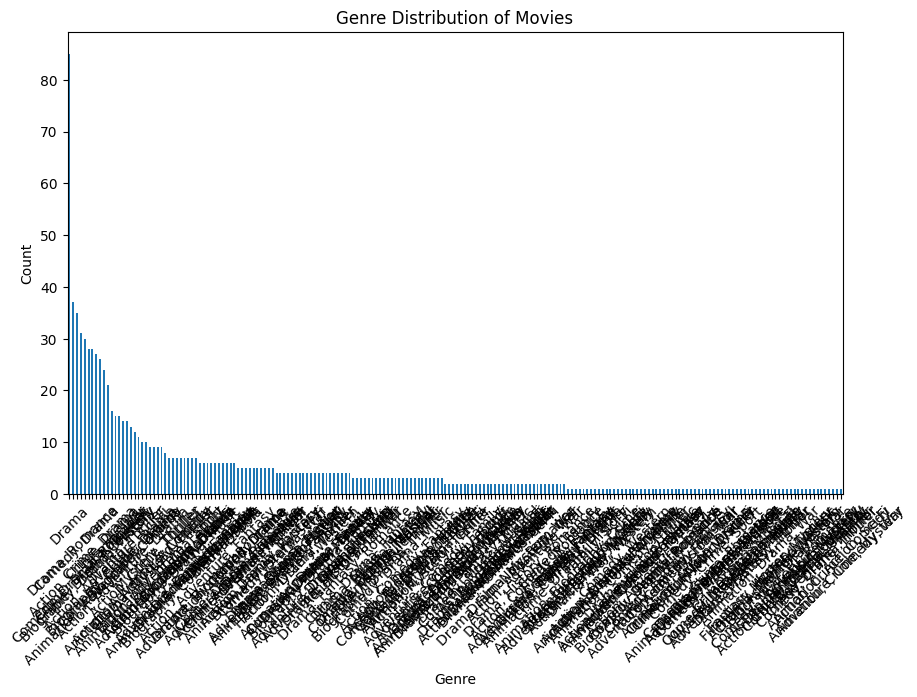

Number of Movies per Genre:
Genre
Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64


In [9]:
# Get the genre distribution
genre_counts = data_frame['Genre'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution of Movies')
plt.xticks(rotation=45)
plt.show()

# Print the number of movies from each genre
print('Number of Movies per Genre:')
print(genre_counts)

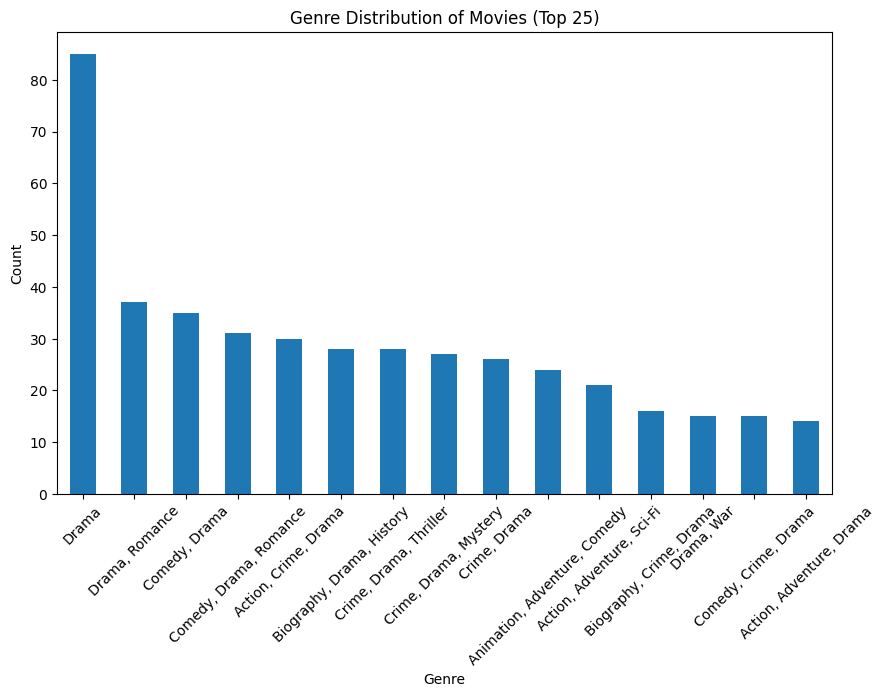

In [17]:

# Get the genre distribution
genre_counts = data_frame['Genre'].value_counts().head(15)

# Plot the histogram
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution of Movies (Top 25)')
plt.xticks(rotation=45)
plt.show()


### Plot a scatterplot in this dataset for the number of movies vs year (Each year, how many movies made to this top 1000 list?)

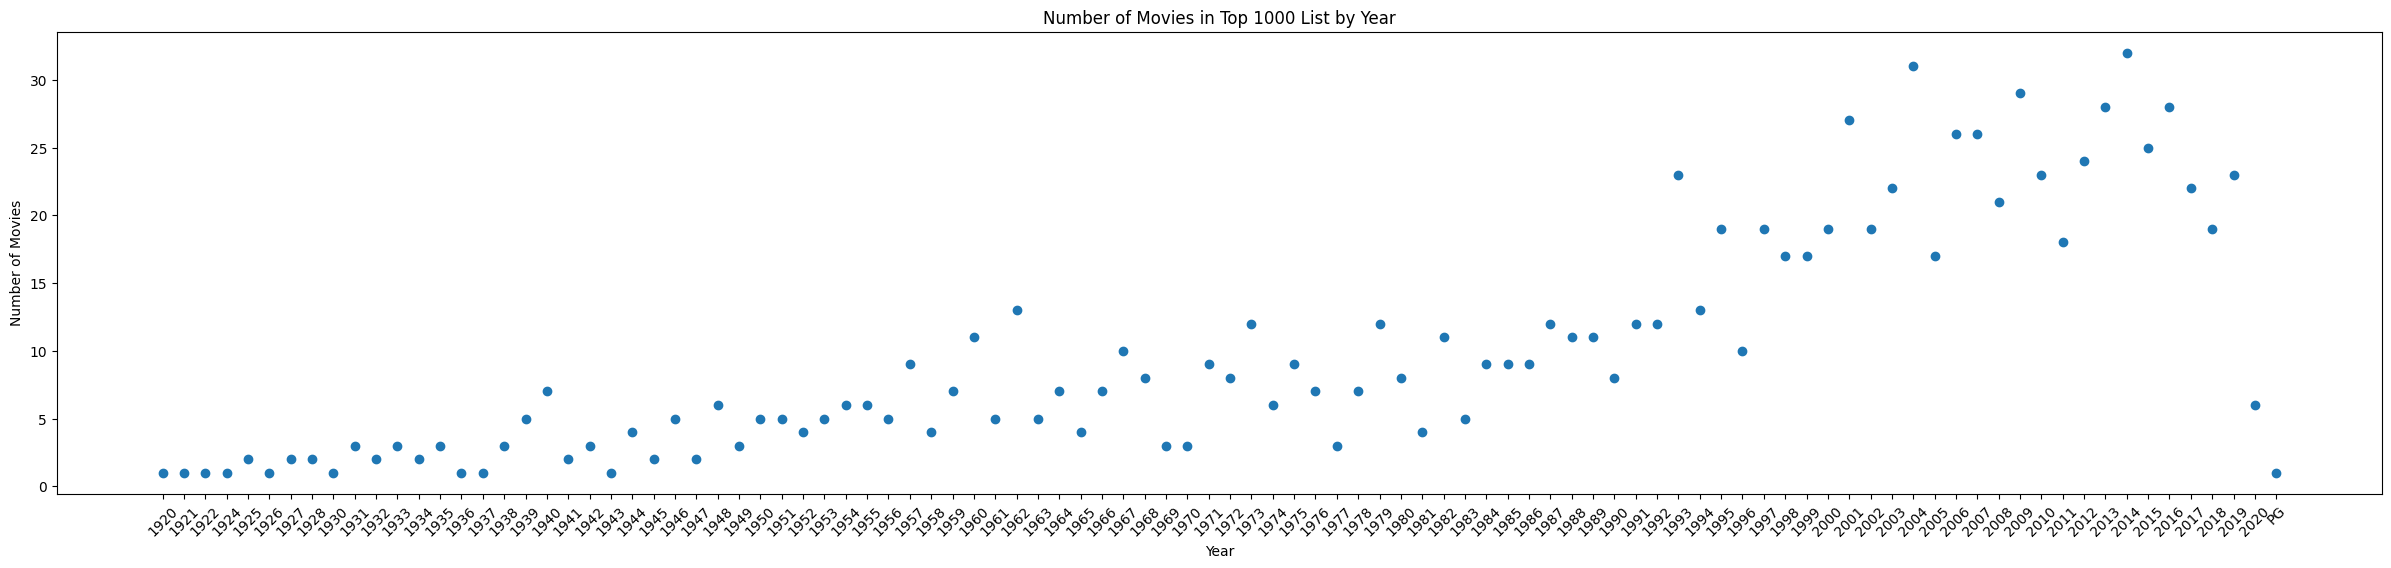

In [10]:
# Group the data by year and calculate the count of movies
movies_per_year = data_frame['Released_Year'].value_counts().sort_index()

# Plot the scatterplot
plt.figure(figsize=(30, 6))
plt.scatter(movies_per_year.index.astype(str), movies_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Top 1000 List by Year')
plt.xticks(rotation=45)
plt.show()